In [2]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
from numpy.fft import fft

from preprocessfunction2 import PLR2d
from preprocessfunction3 import PLR3d
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


'Starting process2'

'Loop through each annotation timestamp and slice the data'

'measurement @9903.9788 has 2.581580855692529% noise data. Rejecting'

'measurement @10083.963085 has 2.8107344632768374% noise data. Rejecting'

'Label the data'

'preprocess and slice data'

'nanp before=50.0, nanp after=2.824372759856631'

'nanp before=50.0, nanp after=0.0'

'nanp before=50.0, nanp after=0.5946481665014867'

'nanp before=50.0, nanp after=0.0'

'nanp before=50.0, nanp after=55.741695303550976'

'measurement @10143.979037000001 has 5.741695303550976% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=94.22251812398284'

'measurement @10203.963207 has 44.22251812398284% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=89.38490620910281'

'measurement @10263.979173 has 39.38490620910281% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=96.43880768128403'

'measurement @10323.96327 has 46.43880768128403% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=89.42457231726283'

'measurement @10383.947344 has 39.42457231726283% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=89.94845360824742'

'measurement @10443.967351000001 has 39.94845360824742% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=99.7034317186838'

'measurement @10503.947438000001 has 49.7034317186838% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=85.88601329373498'

'measurement @10563.967533000001 has 35.886013293734976% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=45.12005649717514'

'nanp before=50.0, nanp after=93.55932203389831'

'measurement @10683.967729 has 43.55932203389831% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=97.79661016949153'

'measurement @10743.951938 has 47.79661016949153% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=93.22033898305085'

'measurement @10803.967821 has 43.22033898305085% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=98.20621468926554'

'measurement @10863.951897 has 48.206214689265536% more noise data after blinkreconstruct. Rejecting'

'nanp before=50.0, nanp after=60.67796610169491'

'measurement @10923.967989 has 10.677966101694913% more noise data after blinkreconstruct. Rejecting'

'merge dataframes'

'save processed data to /Users/Katharina/Desktop/Beispieldaten/PJ06_3_Ruhe-30Stim-eye_id0-diameter_3d_list.csv and /Users/Katharina/Desktop/Beispieldaten/PJ06_3_Ruhe-30Stim-eye_id0-diameter_3d_mean.csv'

,time_slot,eye_id,diameter_3d
0,0.0,eye_id0,3.763926
1,1.0,eye_id0,3.677148
2,2.0,eye_id0,3.546870
3,3.0,eye_id0,3.723315
4,4.0,eye_id0,3.521853
...,...,...,...
996,996.0,eye_id0,3.488090
997,997.0,eye_id0,3.479178
998,998.0,eye_id0,NaN
999,999.0,eye_id0,NaN


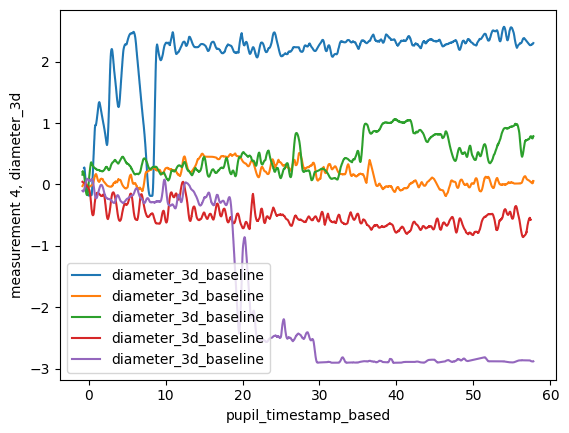

In [14]:
import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(checkdata)

def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass


if os.getlogin()=='marco':
    subject_id="PJ06_2_Ruhe"
    data_dir="/home/marco/Nextcloud/KatharinaBeispieldaten/"
else:
    subject_id="PJ06_3_Ruhe"
    data_dir="/Users/Katharina/Desktop/Beispieldaten"

field="diameter_3d"

config=preprocessing.create_process_config(0,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 

#config.validate_only=True

eye0=preprocessing.process(config,display)

if False: 
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what in eye0:
            ts=what['pupil_timestamp'].iloc[0]
            plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
            plot(what,f"gated @{ts}","pupil_timestamp_based",f"{field}_gated")
            plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
            plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")

        if False:
            for what in eye0:
                plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")

        display(f"Anzahl der Messungen: {len(eye0)}")

sub=None
i=0
for what in eye0:
    preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
    sub = what.plot(ax=sub,x='pupil_timestamp_based', y=f'{field}_baseline',ylabel=f'baseline adjusted pupil size', kind='line')        
    sub.set_ylabel(f'measurement {i}, {field}')
    i=i+1


            

In [ ]:
### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

In [37]:
importlib.reload(preprocessing)
display(preprocessing.get_condition("PJ01_4_Ruhe"))

(30, '30Placebo')

In [28]:
x='PJ01_3_PLR2' 
display(x[:4])

'PJ01'

In [22]:
display(x[5:6])

'4'